In [2]:
from uncertainties import ufloat
from uncertainties import unumpy as unp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [3]:
um=0.05/1000
ub=0.05/100
us=0.03/1000
ud=0.005/1000
weights=pd.read_csv('weights',decimal='.',delimiter='\t')
warr=unp.uarray(weights.Masse,um)
weights

,Name,Masse
0,y050,49.98
1,y100,100.01
2,y200,199.56
3,s050,50.02
4,s100,100.00
5,s200,199.90
6,p050,49.96
7,p100,99.96
8,p200,199.71


In [4]:
long=pd.read_csv('long_measurement',delimiter='\t',index_col=0)
long

,Bieghoehe_1,Bieghoehe_2,Bieghoehe_3,Bieghoehe_4
Gewicht,,,,
y100,0.11,0.12,0.10,0.12
y100+s100,0.24,0.23,0.23,0.23
y100+s100+p100,0.36,0.35,0.34,0.35
p200+y200,0.47,0.47,0.48,0.49
p100+p200+y200,0.60,0.59,0.59,0.61
p100+s100+p200+y200,0.71,0.72,0.72,0.73
p100+s100+p200+y200+y100,0.83,0.83,0.83,0.85
y100+s100+s200+p200+y200,0.95,0.95,0.95,0.93
y100+s100+s200+p200+y200+p100,1.07,1.07,1.07,1.05


In [5]:
weights.Name=weights.Masse

In [6]:
long.Gewicht[1]

AttributeError: 'DataFrame' object has no attribute 'Gewicht'

In [91]:
y050,y100,y200,s050,s100,s200,p050,p100,p200=unp.uarray(weights.Masse/1000,um)
print(y050,y100,y200,s050,s100,s200,p050,p100,p200)

0.04998+/-0.00005 0.10001+/-0.00005 0.19956+/-0.00005 0.05002+/-0.00005 0.10000+/-0.00005 0.19990+/-0.00005 0.04996+/-0.00005 0.09996+/-0.00005 0.19971+/-0.00005


In [9]:
xuarr1=[y100,y100+s100,y100+s100+p100,p200+y200,p100+p200+y200,p100+s100+p200+y200,p100+s100+p200+y200+y100,y100+s100+s200+p200+y200,y100+s100+s200+p200+y200+p100,y100+s100+s200+p200+y200+p100+y050+s050]

In [10]:
print(unp.nominal_values(xuarr1))

[0.10001 0.20001 0.29997 0.39927 0.49923 0.59923 0.69924 0.79918 0.89914
 0.99914]


In [11]:
yuarr1=unp.uarray(long.Bieghoehe_1/1000,ud)
yuarr2=unp.uarray(long.Bieghoehe_2/1000,ud)
yuarr3=unp.uarray(long.Bieghoehe_3/1000,ud)
yuarr4=unp.uarray(long.Bieghoehe_4/1000,ud)

[4.85273931e-06 3.00794129e-06]


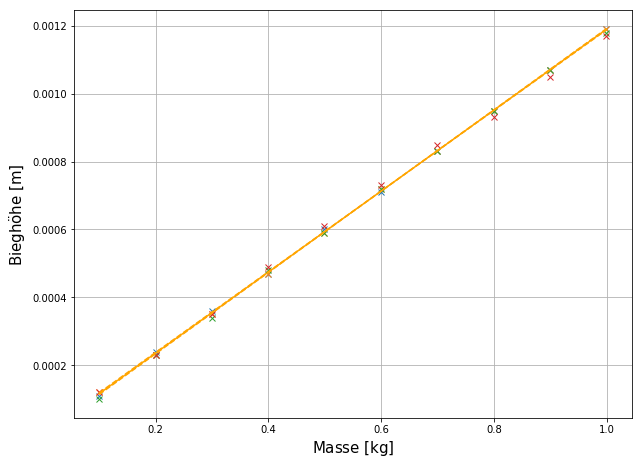

In [29]:
plt.plot(unp.nominal_values(xuarr1),unp.nominal_values(yuarr1),'x',label='Messreihe 1')
plt.plot(unp.nominal_values(xuarr1),unp.nominal_values(yuarr2),'x',label='Messreihe 2')
plt.plot(unp.nominal_values(xuarr1),unp.nominal_values(yuarr3),'x',label='Messreihe 3')
plt.plot(unp.nominal_values(xuarr1),unp.nominal_values(yuarr4),'x',label='Messreihe 4')
#Polynom
def fitfunc(x,a,b):
    return a*x+b

#Fitten
xfit=np.linspace(unp.nominal_values(xuarr1)[0],unp.nominal_values(xuarr1)[-1],100)
popt,pcov=curve_fit(fitfunc,unp.nominal_values(xuarr1),unp.nominal_values(yuarr1))
a,b=popt
c,d=pcov
fit=a*xfit+b

#Ausgabe
plt.plot(xfit,fit,'-',color='orange',label='Lineare Regression')
print(np.sqrt(np.diag(pcov)))
c=np.sqrt(np.diag(pcov))[0]
d=np.sqrt(np.diag(pcov))[1]
dfit1=(a+c)*(xfit)+(b-d)
dfit2=(a-c)*(xfit)+(b+d)
plt.plot(xfit,dfit1,'--',color='orange')
plt.plot(xfit,dfit2,'--',color='orange')

#plt.legend()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel(r'$\mathrm{Masse}\ [\mathrm{kg}]$',size='15')
plt.ylabel(r'$\mathrm{Biegh\"ohe}\ [\mathrm{m}]$',size='15')
plt.rcParams["figure.figsize"]=fig_size
plt.grid()
plt.show()

In [13]:
al=pd.read_csv('aluminium.txt',delimiter='\t')
al
al_a=pd.read_csv('aluminium_turnt.txt',delimiter='\t')
al_a
br=pd.read_csv('brass.txt',delimiter='\t')
br
st=pd.read_csv('steel.txt',delimiter='\t')
st
al_l1=pd.read_csv('aluminium_length.txt',delimiter='\t')
al_l1
al_l2=pd.read_csv('aluminium_length_.txt',delimiter='\t')
al_l2


,Bieghoehe_1,Rueckwaerts_1,Bieghoehe_2,Rueckwaerts_2
0,0.32,0.32,0.48,0.47
1,0.40,0.40,0.56,0.55
2,0.48,0.47,0.64,0.63
3,0.56,0.55,0.71,0.71
4,0.60,0.59,0.76,0.76
5,0.64,0.63,0.80,0.79
6,0.68,0.68,0.83,0.83


In [14]:
xuarr2=np.array([y200+s200,y200+s200+p100,y200+s200+p100+y100,y200+s200+p100+y100+s100,y200+s200+p100+y100+s100+y050,y200+s200+p100+y100+s100+y050+s050,y200+s200+p100+y100+s100+y050+s050+p050])
xuarr3=np.array(xuarr2)+p200
print(xuarr2)
print(xuarr3)

[0.39946000000000004+/-7.071067811865475e-05
 0.49942000000000003+/-8.660254037844386e-05 0.59943+/-0.0001
 0.69943+/-0.00011180339887498949 0.74941+/-0.0001224744871391589
 0.79943+/-0.00013228756555322952 0.84939+/-0.0001414213562373095]
[0.59917+/-8.660254037844386e-05 0.69913+/-0.0001
 0.79914+/-0.00011180339887498949 0.89914+/-0.0001224744871391589
 0.94912+/-0.00013228756555322952
 0.9991399999999999+/-0.0001414213562373095 1.0491+/-0.00015]


In [15]:
len1=ufloat(0.0405,ud)
len2=ufloat(0.0550,ud)
len3=ufloat(0.0355,ud)

In [16]:
yuarr5=unp.uarray(al.Bieghoehe_1/1000,ud)
yuarr6=unp.uarray(al.Rueckwaerts_1/1000,ud)
yuarr7=unp.uarray(al.Bieghoehe_2/1000,ud)
yuarr8=unp.uarray(al.Rueckwaerts_2/1000,ud)
yuarr9=unp.uarray(st.Bieghoehe_1/1000,ud)
yuarr10=unp.uarray(st.Rueckwaerts_1/1000,ud)
yuarr11=unp.uarray(st.Bieghoehe_2/1000,ud)
yuarr12=unp.uarray(st.Rueckwaerts_2/1000,ud)
yuarr13=unp.uarray(br.Bieghoehe_1/1000,ud)
yuarr14=unp.uarray(br.Rueckwaerts_1/1000,ud)
yuarr15=unp.uarray(br.Bieghoehe_2/1000,ud)
yuarr16=unp.uarray(br.Rueckwaerts_2/1000,ud)

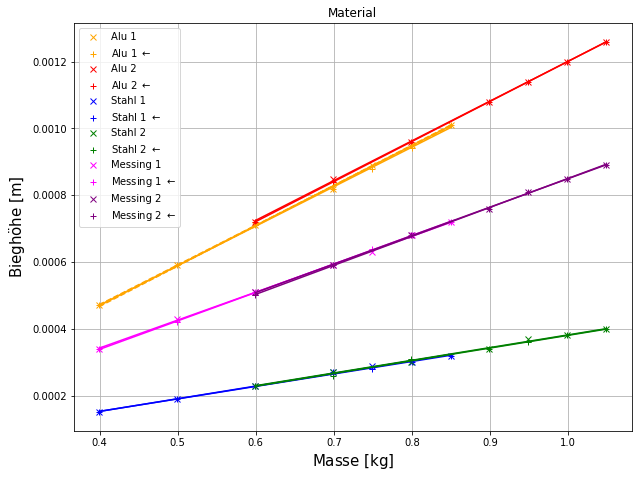

In [78]:
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarr5),'x',label='Alu 1',color='orange')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarr6),'+',label=r'Alu 1 $\leftarrow$',color='orange')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarr7),'x',label='Alu 2',color='red')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarr8),'+',label=r'Alu 2 $\leftarrow$',color='red')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarr9),'x',label='Stahl 1',color='blue')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarr10),'+',label=r'Stahl 1 $\leftarrow$',color='blue')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarr11),'x',label='Stahl 2',color='green')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarr12),'+',label=r'Stahl 2 $\leftarrow$',color='green')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarr13),'x',label='Messing 1',color='magenta')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarr14),'+',label=r'Messing 1 $\leftarrow$',color='magenta')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarr15),'x',label='Messing 2',color='purple')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarr16),'+',label=r'Messing 2 $\leftarrow$',color='purple')
#Polynom
def fitfunc(x,a,b):
    return a*x+b

#Fitten
xfit=np.linspace(unp.nominal_values(xuarr2)[0],unp.nominal_values(xuarr2)[-1],100)
popt,pcov=curve_fit(fitfunc,unp.nominal_values(xuarr2),unp.nominal_values(yuarr5))
a,b=popt
fit=a*xfit+b

#Ausgabe
plt.plot(xfit,fit,'-',color='orange')#,label='Lineare Regression')
c=np.sqrt(np.diag(pcov))[0]
d=np.sqrt(np.diag(pcov))[1]
dfit1=(a+c)*(xfit)+(b-d)
dfit2=(a-c)*(xfit)+(b+d)
plt.plot(xfit,dfit1,'--',color='orange')
plt.plot(xfit,dfit2,'--',color='orange')

def linreg(xfit,xarr,yarr,markeraus='-',grenz=0,markergrenz='--',color='orange',labelaus='Lineare Regression',labelgrenz=None,unumpy=False,first=0,last=-1,xnum=100,xfitrestrictl=None,xfitrestrictr=None,yfitrestrictl=None,yfitrestrictr=None):
    import numpy as np
    import matplotlib.pyplot as plt
    if unumpy == True:
        from uncertainties import unumpy as unp
        xfit=np.linspace(unp.nominal_values(xarr)[first],unp.nominal_values(xarr)[last],xnum)
        popt,pcov=curve_fit(fitfunc,unp.nominal_values(xarr)[xfitrestrictl:xfitrestrictr],unp.nominal_values(yarr)[yfitrestrictl:yfitrestrictr])
    else:
        xfit=np.linspace(xarr[first],xarr[last],xnum)
        popt,pcov=curve_fit(fitfunc,xarr[xfitrestrict:xfitrestrictr],yarr[yfitrestrictl:yfitrestrictr])
    a,b=popt
    fit=a*xfit+b
    c=np.sqrt(np.diag(pcov))[0]
    d=np.sqrt(np.diag(pcov))[1]
    dfit1=(a+c)*(xfit)+(b-d)
    dfit2=(a-c)*(xfit)+(b+d)
    plt.plot(xfit,fit,markeraus,color=color,label=labelaus)
    if grenz==1:
        plt.plot(xfit,dfit1,markergrenz,color=color,label=labelgrenz)
        plt.plot(xfit,dfit2,markergrenz,color=color,label=labelgrenz)
    return

linreg(xfit,xuarr2,yuarr6,labelaus=None,unumpy=True,color='orange')
linreg(xfit,xuarr3,yuarr7,labelaus=None,unumpy=True,color='red')
linreg(xfit,xuarr3,yuarr8,labelaus=None,unumpy=True,color='red')
linreg(xfit,xuarr2,yuarr9,labelaus=None,unumpy=True,color='blue')
linreg(xfit,xuarr2,yuarr10,labelaus=None,unumpy=True,color='blue')
linreg(xfit,xuarr3,yuarr11,labelaus=None,unumpy=True,color='green')
linreg(xfit,xuarr3,yuarr12,labelaus=None,unumpy=True,color='green')
linreg(xfit,xuarr2,yuarr13,labelaus=None,color='magenta',unumpy=True)
linreg(xfit,xuarr2,yuarr14,labelaus=None,unumpy=True,color='magenta')
linreg(xfit,xuarr3,yuarr15,labelaus=None,color='purple',unumpy=True)
linreg(xfit,xuarr3,yuarr16,labelaus=None,unumpy=True,color='purple')

plt.legend()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel(r'$\mathrm{Masse}\ [\mathrm{kg}]$',size='15')
plt.ylabel(r'$\mathrm{Biegh\"ohe}\ [\mathrm{m}]$',size='15')
plt.title('Material')
plt.rcParams["figure.figsize"]=fig_size
plt.grid()
plt.show()

In [19]:
yuarra1=unp.uarray(al_a.Bieghoehe_1/1000,ud)
yuarra2=unp.uarray(al_a.Rueckwaerts_1/1000,ud)
yuarra3=unp.uarray(al_a.Bieghoehe_2/1000,ud)
yuarra4=unp.uarray(al_a.Rueckwaerts_2/1000,ud)

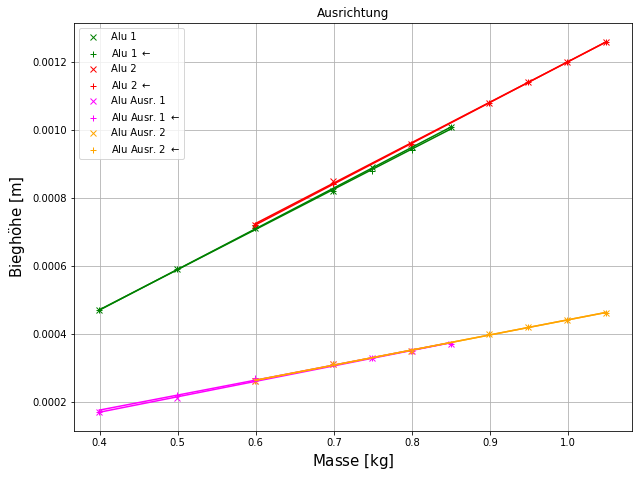

In [79]:
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarr5),'x',label='Alu 1',color='green')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarr6),'+',label=r'Alu 1 $\leftarrow$',color='green')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarr7),'x',label='Alu 2',color='red')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarr8),'+',label=r'Alu 2 $\leftarrow$',color='red')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarra1),'x',label='Alu Ausr. 1',color='magenta')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarra2),'+',label=r'Alu Ausr. 1 $\leftarrow$',color='magenta')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarra3),'x',label='Alu Ausr. 2',color='orange')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarra4),'+',label=r'Alu Ausr. 2 $\leftarrow$',color='orange')

linreg(xfit,xuarr2,yuarr5,color='green',labelaus=None,unumpy=True)
linreg(xfit,xuarr2,yuarr6,color='green',labelaus=None,unumpy=True)
linreg(xfit,xuarr3,yuarr7,labelaus=None,color='red',unumpy=True)
linreg(xfit,xuarr3,yuarr8,labelaus=None,unumpy=True,color='red')
linreg(xfit,xuarr2,yuarra1,color='magenta',labelaus=None,unumpy=True)
linreg(xfit,xuarr2,yuarra2,color='magenta',labelaus=None,unumpy=True)
linreg(xfit,xuarr3,yuarra3,labelaus=None,color='orange',unumpy=True)
linreg(xfit,xuarr3,yuarra4,labelaus=None,unumpy=True,color='orange')

plt.legend()
plt.xlabel(r'$\mathrm{Masse}\ [\mathrm{kg}]$',size='15')
plt.ylabel(r'$\mathrm{Biegh\"ohe}\ [\mathrm{m}]$',size='15')
plt.title('Ausrichtung')
plt.grid()
plt.show()

In [35]:
yuarrl1=unp.uarray(al_l1.Bieghoehe_1/1000,ud)
yuarrl2=unp.uarray(al_l1.Rueckwaerts_1/1000,ud)
yuarrl3=unp.uarray(al_l1.Bieghoehe_2/1000,ud)
yuarrl4=unp.uarray(al_l1.Rueckwaerts_2/1000,ud)

yuarrl5=unp.uarray(al_l2.Bieghoehe_1/1000,ud)
yuarrl6=unp.uarray(al_l2.Rueckwaerts_1/1000,ud)
yuarrl7=unp.uarray(al_l2.Bieghoehe_2/1000,ud)
yuarrl8=unp.uarray(al_l2.Rueckwaerts_2/1000,ud)

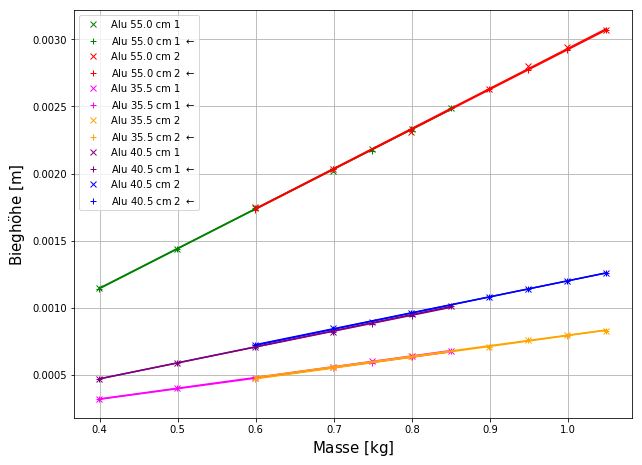

In [38]:
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarrl1),'x',label='Alu 55.0 cm 1',color='green')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarrl2),'+',label=r'Alu 55.0 cm 1 $\leftarrow$',color='green')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarrl3),'x',label='Alu 55.0 cm 2',color='red')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarrl4),'+',label=r'Alu 55.0 cm 2 $\leftarrow$',color='red')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarrl5),'x',label='Alu 35.5 cm 1',color='magenta')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarrl6),'+',label=r'Alu 35.5 cm 1 $\leftarrow$',color='magenta')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarrl7),'x',label='Alu 35.5 cm 2',color='orange')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarrl8),'+',label=r'Alu 35.5 cm 2 $\leftarrow$',color='orange')

plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarr5),'x',label='Alu 40.5 cm 1',color='purple')
plt.plot(unp.nominal_values(xuarr2),unp.nominal_values(yuarr6),'+',label=r'Alu 40.5 cm 1 $\leftarrow$',color='purple')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarr7),'x',label='Alu 40.5 cm 2',color='blue')
plt.plot(unp.nominal_values(xuarr3),unp.nominal_values(yuarr8),'+',label=r'Alu 40.5 cm 2 $\leftarrow$',color='blue')

linreg(xfit,xuarr2,yuarrl1,color='green',labelaus=None,unumpy=True)
linreg(xfit,xuarr2,yuarrl2,color='green',labelaus=None,unumpy=True)
linreg(xfit,xuarr3,yuarrl3,labelaus=None,color='red',unumpy=True)
linreg(xfit,xuarr3,yuarrl4,labelaus=None,unumpy=True,color='red')
linreg(xfit,xuarr2,yuarrl5,color='magenta',labelaus=None,unumpy=True)
linreg(xfit,xuarr2,yuarrl6,color='magenta',labelaus=None,unumpy=True)
linreg(xfit,xuarr3,yuarrl7,labelaus=None,color='orange',unumpy=True)
linreg(xfit,xuarr3,yuarrl8,labelaus=None,unumpy=True,color='orange')

linreg(xfit,xuarr2,yuarr5,color='purple',labelaus=None,unumpy=True)
linreg(xfit,xuarr2,yuarr6,color='purple',labelaus=None,unumpy=True)
linreg(xfit,xuarr3,yuarr7,labelaus=None,color='blue',unumpy=True)
linreg(xfit,xuarr3,yuarr8,labelaus=None,unumpy=True,color='blue')

plt.legend()
plt.xlabel(r'$\mathrm{Masse}\ [\mathrm{kg}]$',size='15')
plt.ylabel(r'$\mathrm{Biegh\"ohe}\ [\mathrm{m}]$',size='15')
plt.grid()
plt.show()

In [40]:
0.985*100*0.590*8

464.91999999999996

In [108]:
def E(L,a,h,b):
    return L**3*9.81/(a*4*h**3*b)

In [109]:
def mean(ar):
    return sum(ar)/len(ar)

In [110]:
h_a=mean(unp.uarray([9.85,9.86,9.85,9.86,9.85],us))/1000
b_a=mean(unp.uarray([5.89,5.91,5.91,5.89,5.90],us))/1000

In [124]:
xfit=np.linspace(unp.nominal_values(xuarr1)[0],unp.nominal_values(xuarr1)[-1],100)
popt,pcov=curve_fit(fitfunc,unp.nominal_values(xuarr1),unp.nominal_values(yuarr1))
a,b=popt
print(E(ufloat(0.405,0.0005),a,b_a,h_a))

(6.745+/-0.025)e+10


In [112]:
print(a)
print(h_a)
print(b_a)

0.0011934218570665487
0.009854000+/-0.000000013
0.005900000+/-0.000000013


In [113]:
h_s=mean(unp.uarray([9.93,9.90,9.90,9.905,9.91],us))/1000
b_s=mean(unp.uarray([5.89,5.88,5.88,5.88,5.87],us))/1000

In [121]:
xfit=np.linspace(unp.nominal_values(xuarr2)[0],unp.nominal_values(xuarr2)[-1],100)
popt,pcov=curve_fit(fitfunc,unp.nominal_values(xuarr2),unp.nominal_values(yuarr9))
a,b=popt
print(E(ufloat(0.405,0.0005),a,b_s,h_s))

(2.132+/-0.008)e+11


In [115]:
print(a)

0.0003793316703742095


In [107]:
0.405**3*9.81/(4*1.18*5.9**3*9.85)

6.824955325970303e-05

## Fehler von Bandmass zu klein!

In [125]:
xfit=np.linspace(unp.nominal_values(xuarr2)[0],unp.nominal_values(xuarr2)[-1],100)
popt,pcov=curve_fit(fitfunc,unp.nominal_values(xuarr2),unp.nominal_values(yuarr13))
a,b=popt
print(E(ufloat(0.405,0.0005),a,b_a,h_a))

(9.62+/-0.04)e+10
